In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_path = '/kaggle/input/hhhhhhhhh/Eimage.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
def zero_pad(image, pad_height, pad_width):
    padded_image = np.zeros((image.shape[0] + 2 * pad_height, image.shape[1] + 2 * pad_width), dtype=image.dtype)
    padded_image[pad_height:pad_height + image.shape[0], pad_width:pad_width + image.shape[1]] = image
    return padded_image

In [4]:
def gaussian_kernel(size, sigma):
    if size % 2 == 0:
        size += 1
    
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    normal = 1 / (2.0 * np.pi * sigma**2)
    
    for x in range(-center, center + 1):
        for y in range(-center, center + 1):
            kernel[x + center, y + center] = normal * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    return kernel / kernel.sum()

In [5]:
def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_image = zero_pad(image, pad_height, pad_width)
    output = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(kernel * padded_image[i:i+kernel_height, j:j+kernel_width])
    
    return output

In [6]:

kernel_height, kernel_width = 3, 3
pad_height, pad_width = kernel_height // 2, kernel_width // 2
padded_original_image = zero_pad(image, pad_height, pad_width)

print("\nAdd Zero Padding To Original Image:\n", padded_original_image)


Add Zero Padding To Original Image:
 [[  0   0   0 ...   0   0   0]
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 ...
 [  0 255 255 ... 255 255   0]
 [  0 255 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


In [7]:

gaussian_filter = gaussian_kernel(5, sigma=1.2)
blurred_image = convolve(image, gaussian_filter)

print("\nGaussian Smoothing:\n", gaussian_filter)
print("\nBlurred Image:\n", blurred_image)


Gaussian Smoothing:
 [[0.00733235 0.02077943 0.02940561 0.02077943 0.00733235]
 [0.02077943 0.05888756 0.08333363 0.05888756 0.02077943]
 [0.02940561 0.08333363 0.11792801 0.08333363 0.02940561]
 [0.02077943 0.05888756 0.08333363 0.05888756 0.02077943]
 [0.00733235 0.02077943 0.02940561 0.02077943 0.00733235]]

Blurred Image:
 [[115.052246 156.6174   171.28433  ... 171.28433  156.6174   115.05224 ]
 [156.6174   213.1989   233.16458  ... 233.16458  213.19888  156.6174  ]
 [171.28435  233.16458  255.00002  ... 255.00002  233.16458  171.28433 ]
 ...
 [171.28435  233.16458  255.00002  ... 255.00002  233.16458  171.28433 ]
 [156.6174   213.19888  233.16458  ... 233.16458  213.1989   156.6174  ]
 [115.052246 156.6174   171.28435  ... 171.28435  156.6174   115.05223 ]]


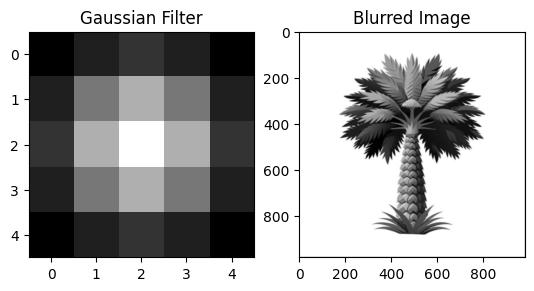

In [8]:

plt.gray()
plt.subplot(121)
plt.imshow(gaussian_filter)
plt.title('Gaussian Filter')
plt.subplot(122)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()

In [9]:

kernel_height, kernel_width = 3, 3

pad_height, pad_width = kernel_height // 2, kernel_width // 2

padded_blurred_image = zero_pad(blurred_image, pad_height, pad_width)

print("\nAdd Zero Padding To Blurred Image:\n", padded_blurred_image)


Add Zero Padding To Blurred Image:
 [[  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.       115.052246 156.6174   ... 156.6174   115.05224    0.      ]
 [  0.       156.6174   213.1989   ... 213.19888  156.6174     0.      ]
 ...
 [  0.       156.6174   213.19888  ... 213.1989   156.6174     0.      ]
 [  0.       115.052246 156.6174   ... 156.6174   115.05223    0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]


In [10]:

Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

# Convolve with Sobel Kernels
Ix = convolve(blurred_image, Kx)
Iy = convolve(blurred_image, Ky)

print("\nGradient in x-Direction (Gx):\n", Ix)
print("\nGradient in y-Direction (Gy):\n", Iy)


Gradient in x-Direction (Gx):
 [[ 526.4337    189.01135    49.299545 ...  -49.29956  -189.01138
  -526.4337  ]
 [ 816.1798    293.0421     76.43373  ...  -76.43375  -293.04214
  -816.1797  ]
 [ 912.6926    327.6942     85.472    ...  -85.471954 -327.69424
  -912.6926  ]
 ...
 [ 912.6926    327.69418    85.472015 ...  -85.47197  -327.6942
  -912.6927  ]
 [ 816.1798    293.0421     76.43379  ...  -76.43376  -293.04218
  -816.1798  ]
 [ 526.4337    189.01138    49.29959  ...  -49.29956  -189.01141
  -526.4337  ]]

Gradient in y-Direction (Gy):
 [[-526.4337   -816.1798   -912.6926   ... -912.6926   -816.1798
  -526.4337  ]
 [-189.01138  -293.0421   -327.6942   ... -327.69418  -293.04214
  -189.01141 ]
 [ -49.29956   -76.43373   -85.472    ...  -85.472015  -76.433685
   -49.29956 ]
 ...
 [  49.29959    76.43381    85.471954 ...   85.472      76.43375
    49.29956 ]
 [ 189.01138   293.0421    327.69415  ...  327.69424   293.0421
   189.01141 ]
 [ 526.4337    816.1797    912.6926   ...  912.

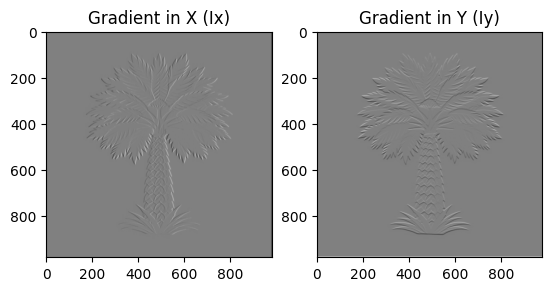

In [11]:

plt.subplot(121)
plt.imshow(Ix)
plt.title('Gradient in X (Ix)')
plt.subplot(122)
plt.imshow(Iy)
plt.title('Gradient in Y (Iy)')
plt.show()

In [12]:

gradient_magnitude = np.sqrt(Ix**2 + Iy**2)
gradient_direction = np.arctan2(Iy, Ix) * (180 / np.pi)

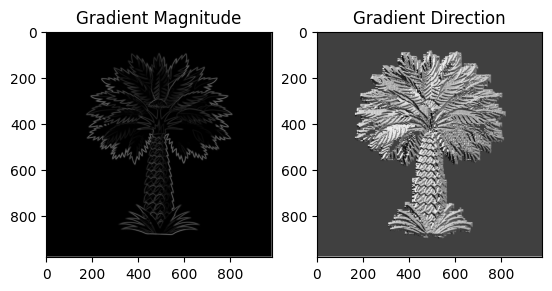

In [13]:

plt.subplot(121)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.subplot(122)
plt.imshow(gradient_direction, cmap='gray')
plt.title('Gradient Direction')
plt.show()

In [14]:

def apply_threshold(magnitude, threshold=100):
    thresholded = np.zeros_like(magnitude)
    thresholded[magnitude > threshold] = 255
    return thresholded

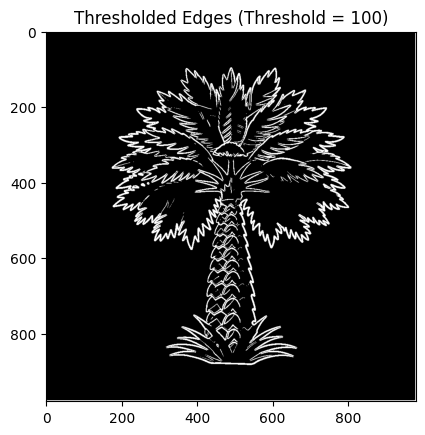

In [15]:

threshold = 100 
edges = apply_threshold(gradient_magnitude, threshold)
# Display Thresholded Edges
plt.imshow(edges, cmap='gray')
plt.title(f'Thresholded Edges (Threshold = {threshold})')
plt.show()

In [16]:

print("\nGradient Magnitude:\n", gradient_magnitude)
print("\nGradient Direction:\n", gradient_direction)
print("\nThresholded Edges:\n", edges)


Gradient Magnitude:
 [[744.48975 837.77966 914.02313 ... 914.02313 837.77966 744.48975]
 [837.77966 414.42413 336.49014 ... 336.4901  414.42416 837.7796 ]
 [914.02313 336.49014 120.87566 ... 120.87564 336.49014 914.02313]
 ...
 [914.02313 336.4901  120.87564 ... 120.87564 336.49014 914.0232 ]
 [837.77966 414.42413 336.4901  ... 336.49017 414.4242  837.77966]
 [744.48975 837.7796  914.02313 ... 914.0232  837.77966 744.48975]]

Gradient Direction:
 [[ -45.         -76.96126    -86.90815   ...  -93.09185   -103.03875
  -135.       ]
 [ -13.038745   -45.         -76.87067   ... -103.12934   -135.
  -166.96126  ]
 [  -3.0918562  -13.129337   -45.        ... -134.99997   -166.87068
  -176.90814  ]
 ...
 [   3.0918581   13.129351    44.99998   ...  134.99998    166.87067
   176.90814  ]
 [  13.038745    45.          76.87065   ...  103.12934    135.
   166.96126  ]
 [  45.          76.96126     86.90814   ...   93.09185    103.03875
   135.       ]]

Thresholded Edges:
 [[255. 255. 255. ... 